#### Day level information on 2019-nCoV affected cases

Context
From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

Johns Hopkins University has made an excellent dashboard using the affected cases data. This data is extracted from the same link and made available in csv format.

Content
2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
for dirpath, dirnames, filenames in os.walk(os.getcwd()):
    print(filenames)

['2019_nCoV_data.csv', 'CoronaVirus_2019.ipynb', 'novel-corona-virus-2019-dataset.zip', 'time_series_2019_ncov_confirmed.csv', 'time_series_2019_ncov_deaths.csv', 'time_series_2019_ncov_recovered.csv']
['CoronaVirus_2019-checkpoint.ipynb']


In [92]:
corona_df = pd.read_csv('2019_nCoV_data.csv')
# df_lat = pd.read_csv('time_series_2019_ncov_confirmed.csv',usecols=['Country/Region','Province/State','Lat','Long'])

In [93]:
corona_df.isnull().sum()

Sno                 0
Date                0
Province/State    418
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [94]:
# corona_df['Province/State']+'/'+corona_df['Country']
corona_df.loc[corona_df['Province/State'].isnull(),'Province/State']='UNKNOWN'
# df_lat.loc[df_lat['Province/State'].isnull(),'Province/State']='UNKNOWN'

In [95]:
corona_df['Country_State'] = corona_df.Country+'-'+corona_df['Province/State']
# df_lat['Country_State'] = df_lat['Country/Region']+'-'+df_lat['Province/State']

In [102]:
corona_df['Date'] = pd.to_datetime(corona_df.Date)

In [109]:
corona_df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Country_State
0,1,2020-01-22 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0,China-Anhui
1,2,2020-01-22 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0,China-Beijing
2,3,2020-01-22 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0,China-Chongqing
3,4,2020-01-22 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0,China-Fujian
4,5,2020-01-22 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0,China-Gansu


### Total Conformed cases by country

C:\Users\sumasark\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


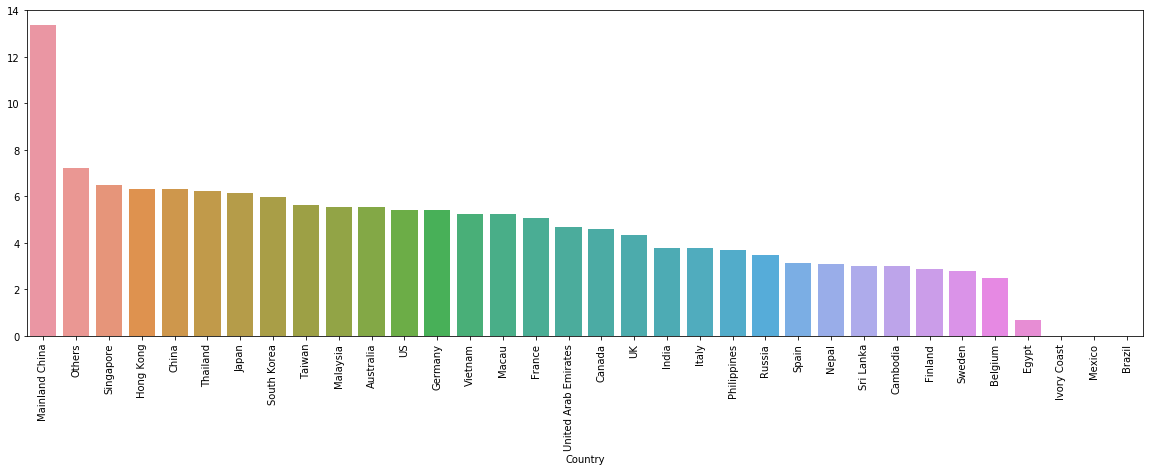

In [197]:
plt.figure(figsize=(20,6))
sns.barplot(corona_df.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).index,
np.log(corona_df.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).values))
plt.xticks(rotation=90)
plt.show()

### Total Deaths By country

C:\Users\sumasark\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


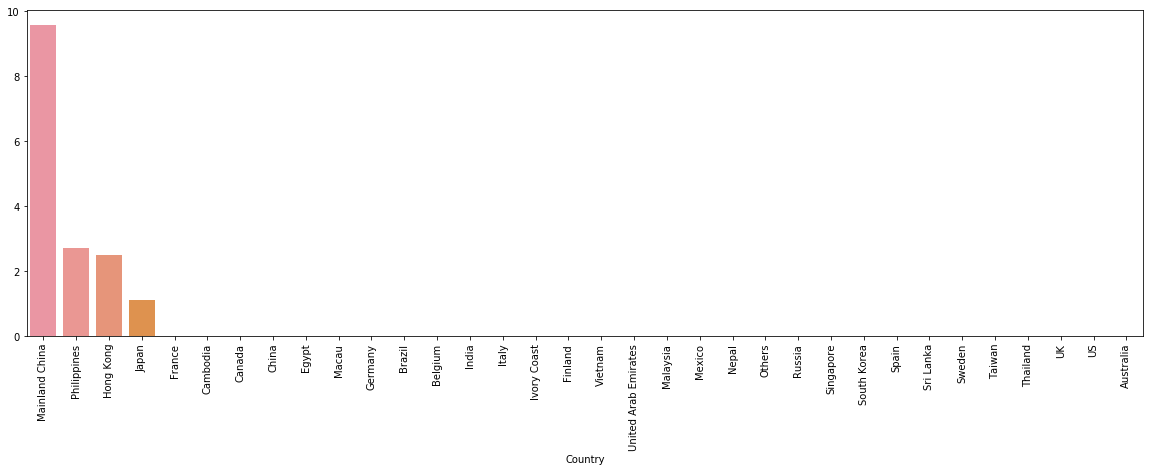

In [182]:
plt.figure(figsize=(20,6))
sns.barplot(corona_df.groupby('Country')['Deaths'].sum().sort_values(ascending=False).index,
np.log(corona_df.groupby('Country')['Deaths'].sum().sort_values(ascending=False).values))
plt.xticks(rotation=90)
plt.show()

#### Total Recovered by countries

C:\Users\sumasark\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


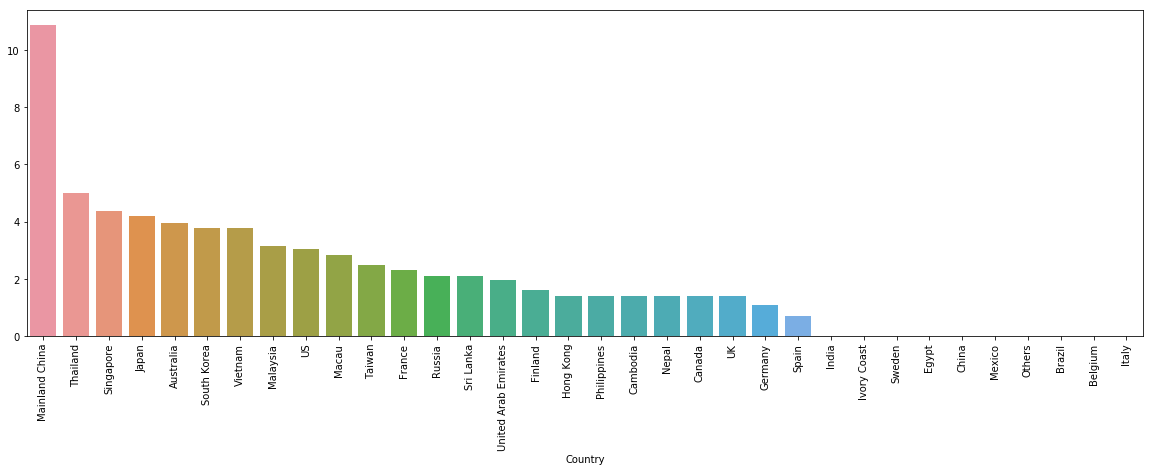

In [181]:
plt.figure(figsize=(20,6))
sns.barplot(corona_df.groupby('Country')['Recovered'].sum().sort_values(ascending=False).index,
np.log(corona_df.groupby('Country')['Recovered'].sum().sort_values(ascending=False).values))
plt.xticks(rotation=90)
plt.show()

#### Number Of Cases over time

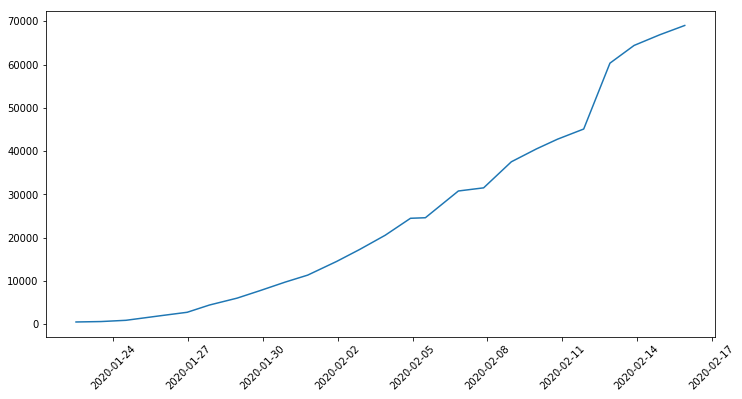

In [180]:
plt.figure(figsize=(12,6))
plt.plot(corona_df.groupby('Date')['Confirmed'].sum().index,corona_df.groupby('Date')['Confirmed'].sum().values)
plt.xticks(rotation=45)
plt.show()

#### Number Of Death over time

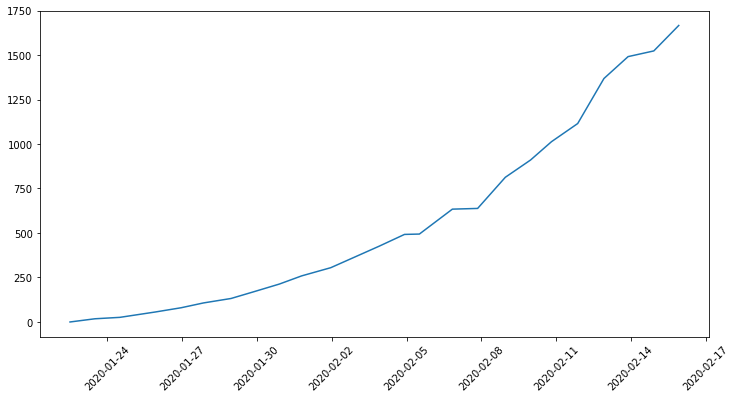

In [179]:
plt.figure(figsize=(12,6))
plt.plot(corona_df.groupby('Date')['Deaths'].sum().index,corona_df.groupby('Date')['Deaths'].sum().values)
plt.xticks(rotation=45)
plt.show()

### Number Of Recovery Over Time

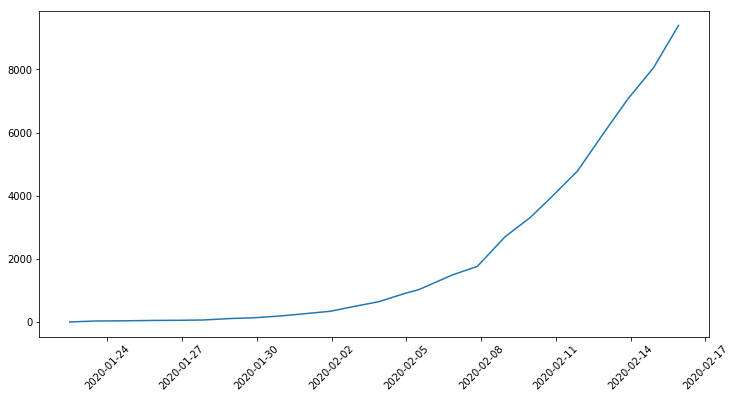

In [178]:
plt.figure(figsize=(12,6))
plt.plot(corona_df.groupby('Date')['Recovered'].sum().index,corona_df.groupby('Date')['Recovered'].sum().values)
plt.xticks(rotation=45)
plt.show()

In [154]:
corona_df_conformed = corona_df.groupby('Date')['Confirmed'].sum().reset_index()
corona_df_death = corona_df.groupby('Date')['Deaths'].sum().reset_index()
corona_df_recovered = corona_df.groupby('Date')['Recovered'].sum().reset_index()
corona_df_conformed = corona_df_conformed.merge(corona_df_death,how='inner',on='Date')
corona_df_conformed = corona_df_conformed.merge(corona_df_recovered,how='inner',on='Date')
corona_df_conformed['Mortality_Rate'] = round((100*(corona_df_conformed.Deaths/corona_df_conformed.Confirmed)),3)

### Mortality Rate

[]

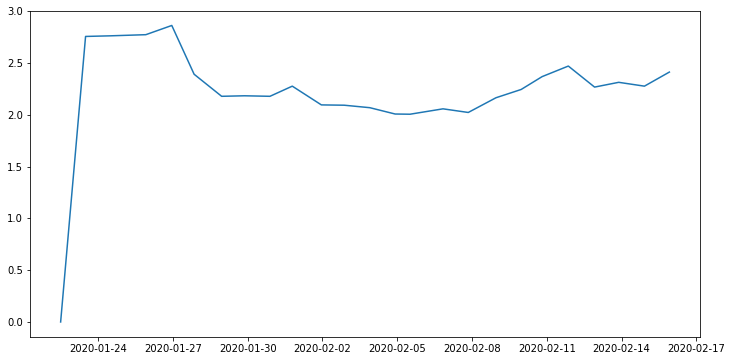

In [177]:
plt.figure(figsize=(12,6))
plt.plot(corona_df_conformed.Date,corona_df_conformed.Mortality_Rate)
plt.plot()

### Trend for Conformed Cases,Death,Recovered

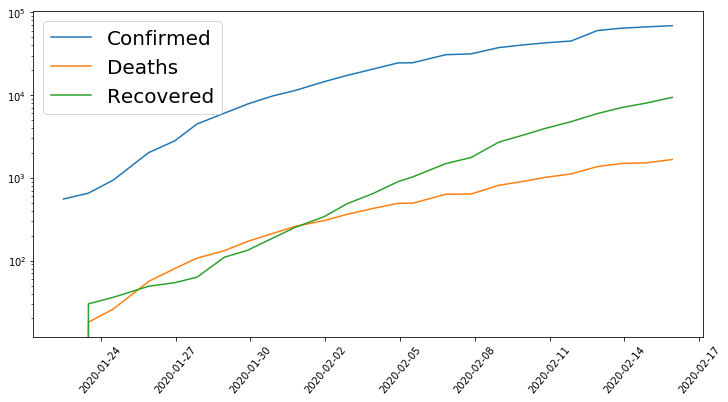

In [176]:
plt.figure(figsize=(12,6))
plt.plot(corona_df_conformed.Date,corona_df_conformed.Confirmed)
plt.plot(corona_df_conformed.Date,corona_df_conformed.Deaths)
plt.plot(corona_df_conformed.Date,corona_df_conformed.Recovered)
plt.legend(['Confirmed', 'Deaths','Recovered'], loc='best', fontsize=20)
plt.yscale('log')
plt.xticks(rotation=50)
plt.show()

#### Number Of cases by states in Mainland China

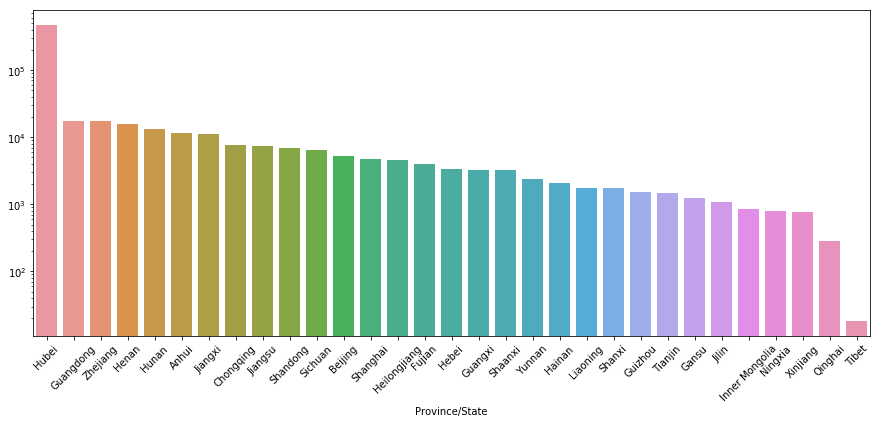

In [195]:
plt.figure(figsize=(15,6))
sns.barplot(
corona_df[corona_df.Country=='Mainland China'].groupby('Province/State')['Confirmed'].sum().sort_values(ascending=False).index,
corona_df[corona_df.Country=='Mainland China'].groupby('Province/State')['Confirmed'].sum().sort_values(ascending=False).values
)
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()